# PROJECT : Energy Analytics and Prediction for USA.
## Group 11 Shruti Houji and Sakshi Rathi.

We have used the data from eia.gov . We have analysed the resources of natural gas. Aspects like price, imports and exports, production and consumption. The analysis includes:
1. ts decomposition
2. ts visualisation
3. description of ts
4. ts models
5. predicitons
6. team contributions

# NATURAL GAS:
    1. prices
    2. production
    3. imports and exports
    4. consumption
    
 This file contains anaylsis of production and consumption. The second file contains prices and imports and exports

In [186]:
#libraries 
import pandas as pd
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

import matplotlib.pyplot as plt
from matplotlib import pyplot

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
from statsmodels.tsa.arima.model import ARIMA

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import xlrd

## 1. Production
For production, we analyse the overall production of natural gas. We have used the column 'U.S. Natural Gas Gross Withdrawals (MMcf)' , thus treating this as a univariate time series. 

1. load data

In [187]:
data = pd.read_excel('NG_SUM_LSUM_DCU_NUS_M.xls', sheet_name = "Data 2", skiprows = 2)
data.head()

,Date,U.S. Natural Gas Gross Withdrawals (MMcf),U.S. Natural Gas Gross Withdrawals from Gas Wells (MMcf),U.S. Natural Gas Gross Withdrawals from Oil Wells (MMcf),U.S. Natural Gas Gross Withdrawals from Shale Gas (Million Cubic Feet),U.S. Natural Gas Gross Withdrawals from Coalbed Wells (MMcf),U.S. Natural Gas Repressuring (MMcf),U.S. Nonhydrocarbon Gases Removed from Natural Gas (MMcf),U.S. Natural Gas Vented and Flared (MMcf),U.S. Natural Gas Marketed Production (MMcf),U.S. Natural Gas Plant Liquids Production (Million Cubic Feet),U.S. Dry Natural Gas Production (MMcf)
0,1973-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948000,79000,NaN
1,1973-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962000,79000,NaN
2,1973-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907000,77000,NaN
3,1973-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1814000,73000,NaN
4,1973-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1898000,77000,NaN


In [188]:
#drop na values
data = data.dropna()
data.head()

,Date,U.S. Natural Gas Gross Withdrawals (MMcf),U.S. Natural Gas Gross Withdrawals from Gas Wells (MMcf),U.S. Natural Gas Gross Withdrawals from Oil Wells (MMcf),U.S. Natural Gas Gross Withdrawals from Shale Gas (Million Cubic Feet),U.S. Natural Gas Gross Withdrawals from Coalbed Wells (MMcf),U.S. Natural Gas Repressuring (MMcf),U.S. Nonhydrocarbon Gases Removed from Natural Gas (MMcf),U.S. Natural Gas Vented and Flared (MMcf),U.S. Natural Gas Marketed Production (MMcf),U.S. Natural Gas Plant Liquids Production (Million Cubic Feet),U.S. Dry Natural Gas Production (MMcf)
408,2007-01-15,2042882.0,1208647.0,495368.0,169026.0,169842.0,323929.0,55318.0,11165.0,1652470,76119,1576351.0
409,2007-02-15,1878003.0,1109144.0,462784.0,152669.0,153405.0,305232.0,48838.0,10473.0,1513461,69716,1443745.0
410,2007-03-15,2094555.0,1256526.0,499160.0,169026.0,169842.0,323291.0,55329.0,12849.0,1703085,78451,1624634.0
411,2007-04-15,1994942.0,1197836.0,469170.0,163574.0,164363.0,302337.0,53009.0,12923.0,1626673,74931,1551743.0
412,2007-05-15,2066642.0,1273889.0,453886.0,169026.0,169842.0,280878.0,51144.0,12070.0,1722549,79347,1643202.0


In [189]:
#Convert the Date column into a date object
data['Date'] = pd.to_datetime(data['Date'])
#Set Date as a Pandas DatetimeIndex
data.index = pd.DatetimeIndex(data['Date'])
data.head()

,Date,U.S. Natural Gas Gross Withdrawals (MMcf),U.S. Natural Gas Gross Withdrawals from Gas Wells (MMcf),U.S. Natural Gas Gross Withdrawals from Oil Wells (MMcf),U.S. Natural Gas Gross Withdrawals from Shale Gas (Million Cubic Feet),U.S. Natural Gas Gross Withdrawals from Coalbed Wells (MMcf),U.S. Natural Gas Repressuring (MMcf),U.S. Nonhydrocarbon Gases Removed from Natural Gas (MMcf),U.S. Natural Gas Vented and Flared (MMcf),U.S. Natural Gas Marketed Production (MMcf),U.S. Natural Gas Plant Liquids Production (Million Cubic Feet),U.S. Dry Natural Gas Production (MMcf)
Date,,,,,,,,,,,,
2007-01-15,2007-01-15,2042882.0,1208647.0,495368.0,169026.0,169842.0,323929.0,55318.0,11165.0,1652470,76119,1576351.0
2007-02-15,2007-02-15,1878003.0,1109144.0,462784.0,152669.0,153405.0,305232.0,48838.0,10473.0,1513461,69716,1443745.0
2007-03-15,2007-03-15,2094555.0,1256526.0,499160.0,169026.0,169842.0,323291.0,55329.0,12849.0,1703085,78451,1624634.0
2007-04-15,2007-04-15,1994942.0,1197836.0,469170.0,163574.0,164363.0,302337.0,53009.0,12923.0,1626673,74931,1551743.0
2007-05-15,2007-05-15,2066642.0,1273889.0,453886.0,169026.0,169842.0,280878.0,51144.0,12070.0,1722549,79347,1643202.0


In [190]:
data.describe()

,U.S. Natural Gas Gross Withdrawals (MMcf),U.S. Natural Gas Gross Withdrawals from Gas Wells (MMcf),U.S. Natural Gas Gross Withdrawals from Oil Wells (MMcf),U.S. Natural Gas Gross Withdrawals from Shale Gas (Million Cubic Feet),U.S. Natural Gas Gross Withdrawals from Coalbed Wells (MMcf),U.S. Natural Gas Repressuring (MMcf),U.S. Nonhydrocarbon Gases Removed from Natural Gas (MMcf),U.S. Natural Gas Vented and Flared (MMcf),U.S. Natural Gas Marketed Production (MMcf),U.S. Natural Gas Plant Liquids Production (Million Cubic Feet),U.S. Dry Natural Gas Production (MMcf)
count,1.800000e+02,1.800000e+02,180.000000,1.800000e+02,180.000000,180.000000,180.000000,180.00000,1.800000e+02,180.000000,1.800000e+02
mean,2.673923e+06,8.593347e+05,458293.100000,1.241227e+06,115067.911111,292040.200000,41746.616667,22834.20000,2.317302e+06,139100.533333,2.178201e+06
std,4.735611e+05,2.658863e+05,63917.203461,7.758652e+05,37802.970377,29516.969759,19282.414134,10443.33231,4.743709e+05,53021.593495,4.220554e+05
min,1.878003e+06,4.666310e+05,276742.000000,1.526690e+05,58973.000000,144521.000000,11011.000000,10473.00000,1.513461e+06,69716.000000,1.443745e+06
25%,2.268052e+06,6.080390e+05,412941.750000,5.523918e+05,81330.750000,275905.000000,24287.500000,14953.50000,1.895226e+06,90296.250000,1.804930e+06
50%,2.603894e+06,8.434345e+05,463844.000000,1.172946e+06,108439.500000,295790.500000,37025.500000,20907.50000,2.257408e+06,133741.000000,2.125388e+06
75%,2.980376e+06,1.099411e+06,502746.500000,1.886812e+06,154371.250000,313370.250000,59590.750000,25262.25000,2.627725e+06,177888.000000,2.449836e+06
max,3.680343e+06,1.340328e+06,584648.000000,2.657326e+06,171282.000000,347262.000000,78356.000000,59670.00000,3.283998e+06,247263.000000,3.036735e+06


Lag features

In [191]:
df = data[['U.S. Natural Gas Gross Withdrawals (MMcf)']].copy()
df.head()

temps = pd.DataFrame(df.values)
df1 = pd.concat([temps.shift(1), temps], axis = 1 )
df1.columns = ['t', 't+1']
df1.head()

,t,t+1
0,NaN,2042882.0
1,2042882.0,1878003.0
2,1878003.0,2094555.0
3,2094555.0,1994942.0
4,1994942.0,2066642.0


2. Data Visualisation

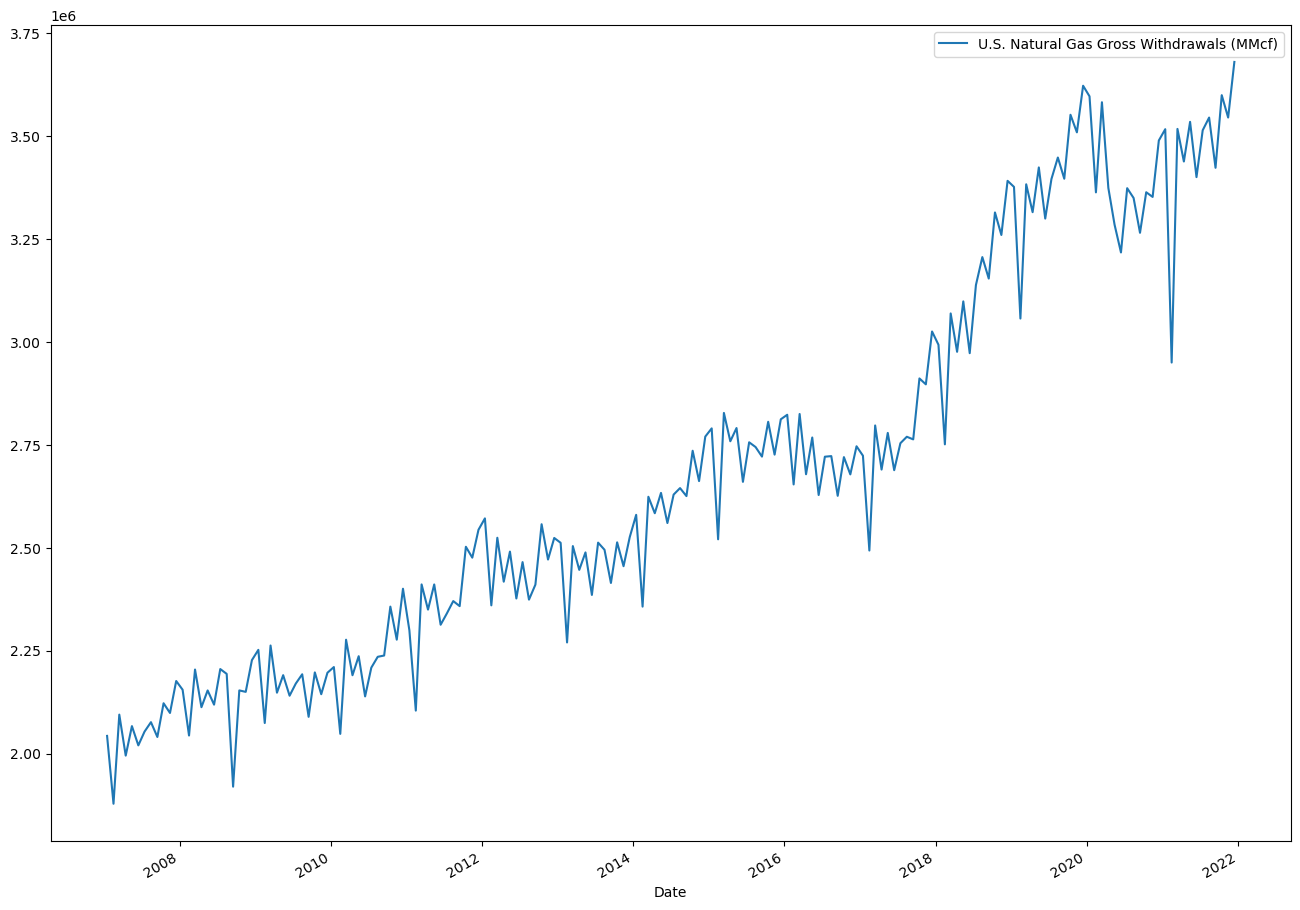

In [192]:
# time series plot
df.plot()
pyplot.show()

The plot shows that there is a overall increasing trend in the production of natural gas.

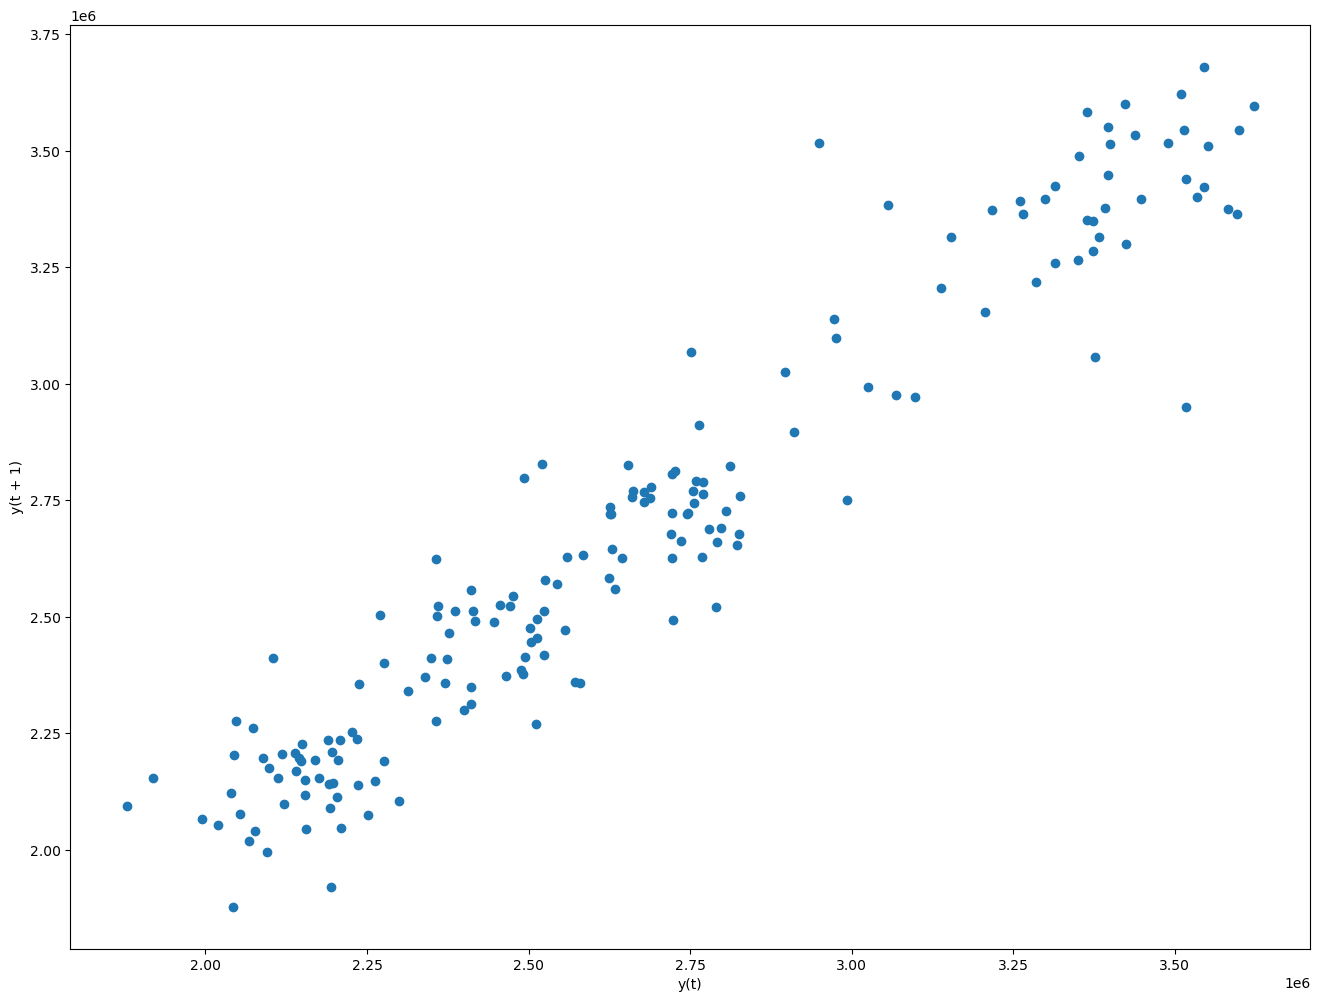

In [193]:
#lag plot 
lag_plot(df)
pyplot.show()

There is a positive correlation between the present and the future values.  It indicated there is a trend or a seasonal component present in the data.

C:\Users\Sakshi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



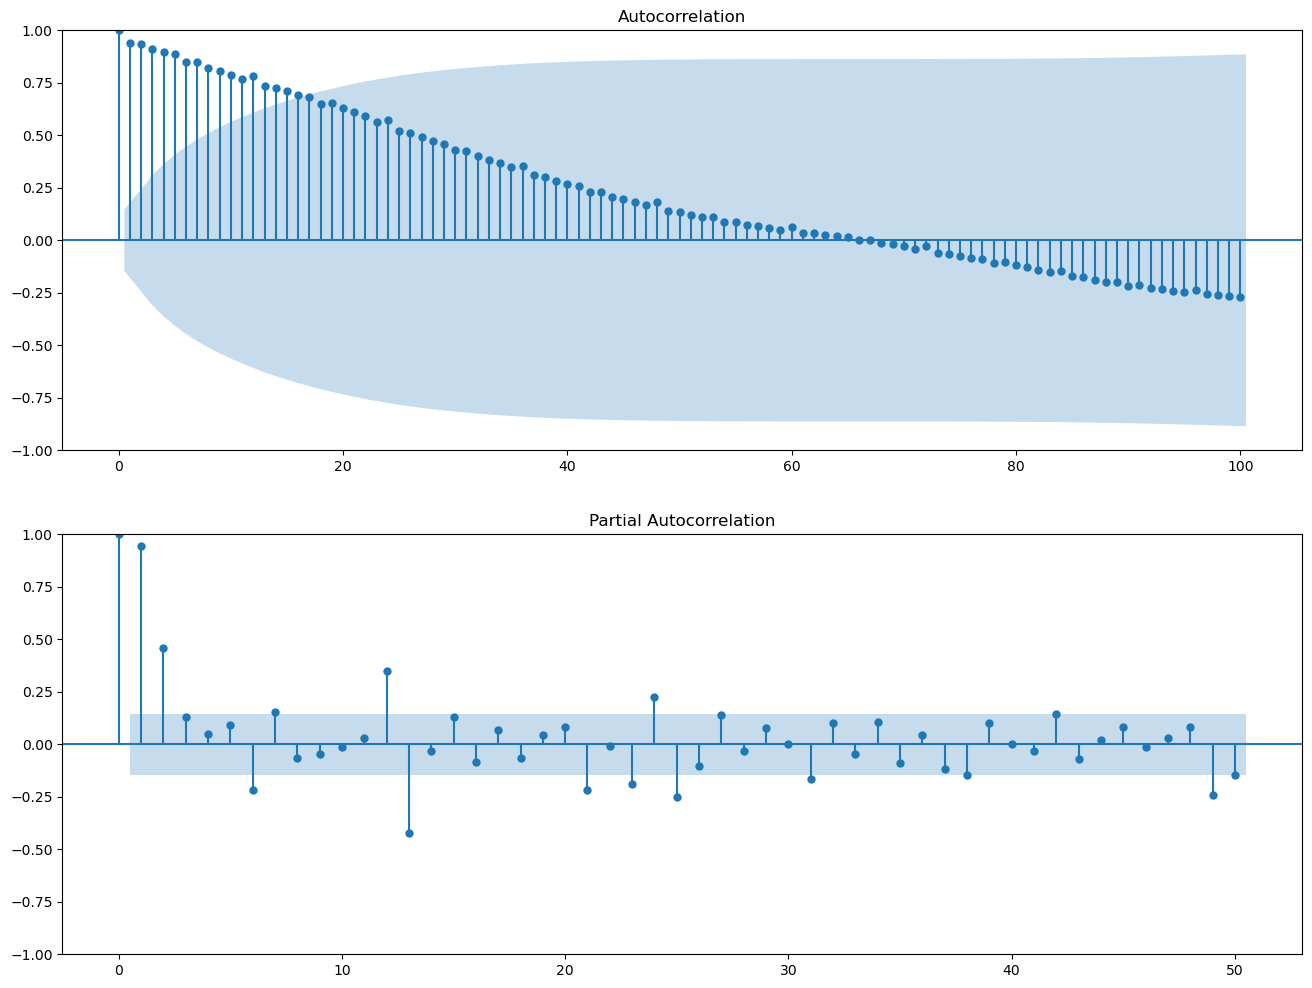

In [194]:
#autocorrelation plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(df, lags=100, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(df, lags=50, ax=pyplot.gca())
pyplot.show()

The correlation decreases as the lag increases. There is a strong correlation for lag = 1.

3. Decomposition: 
Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.

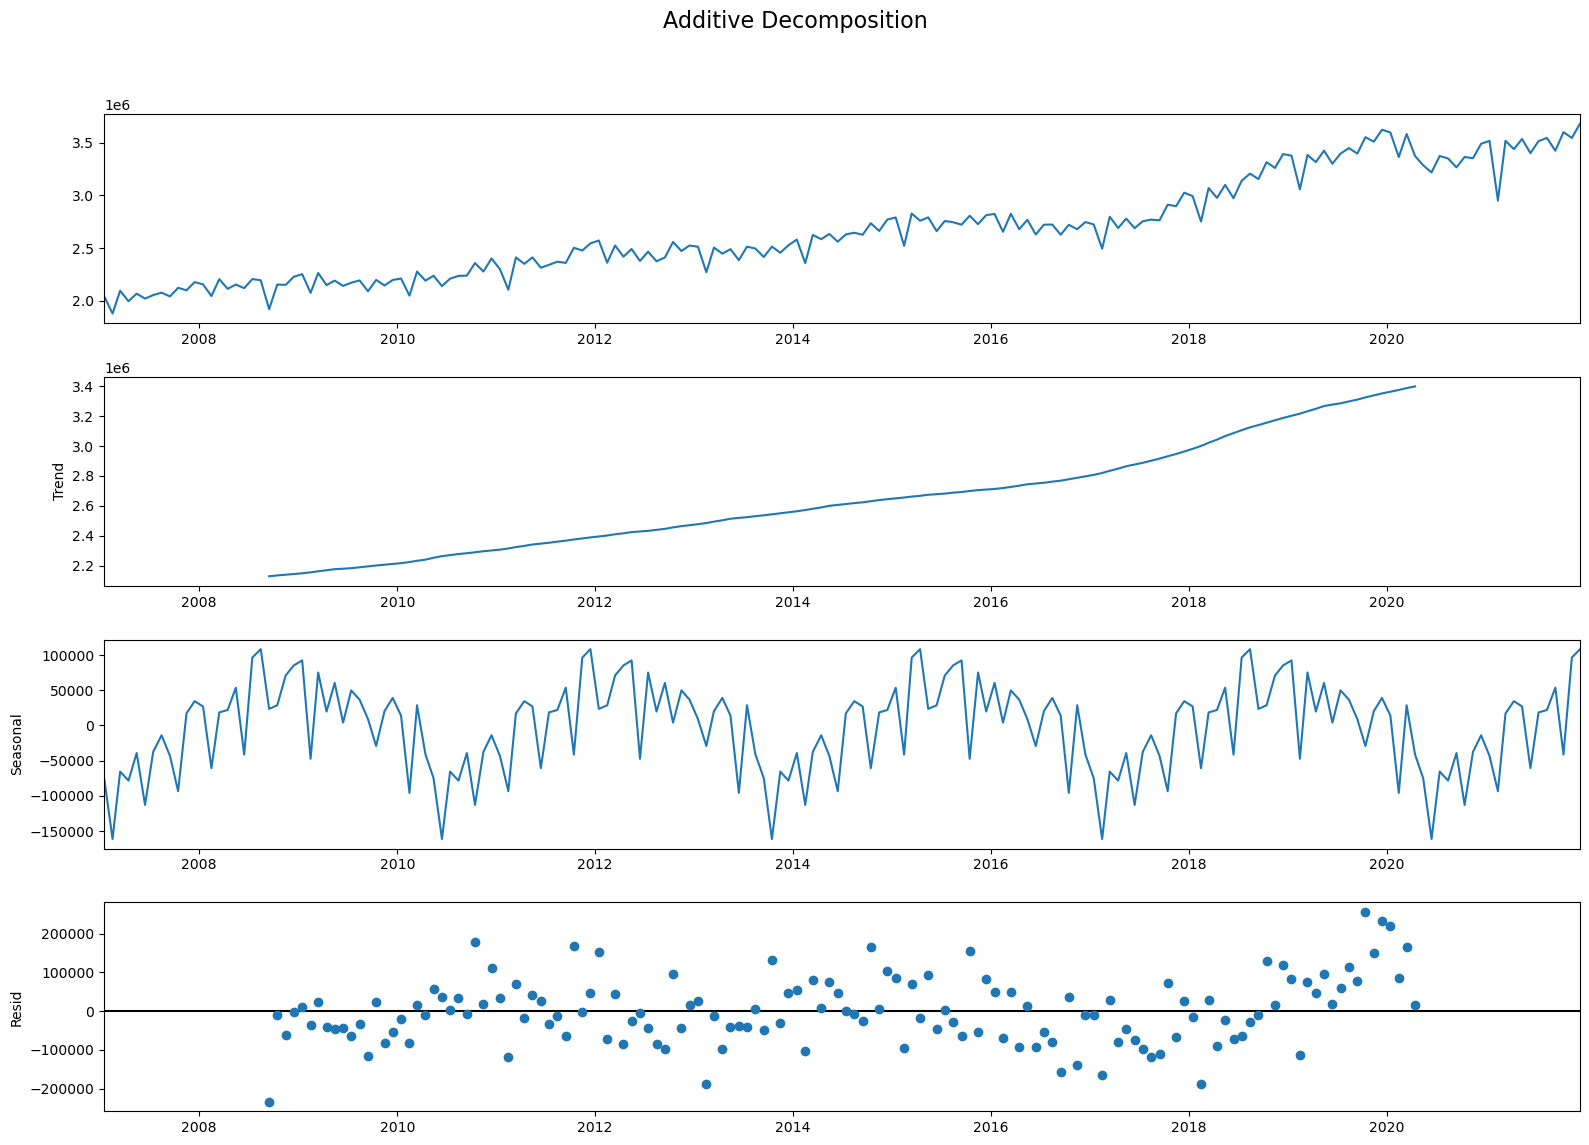

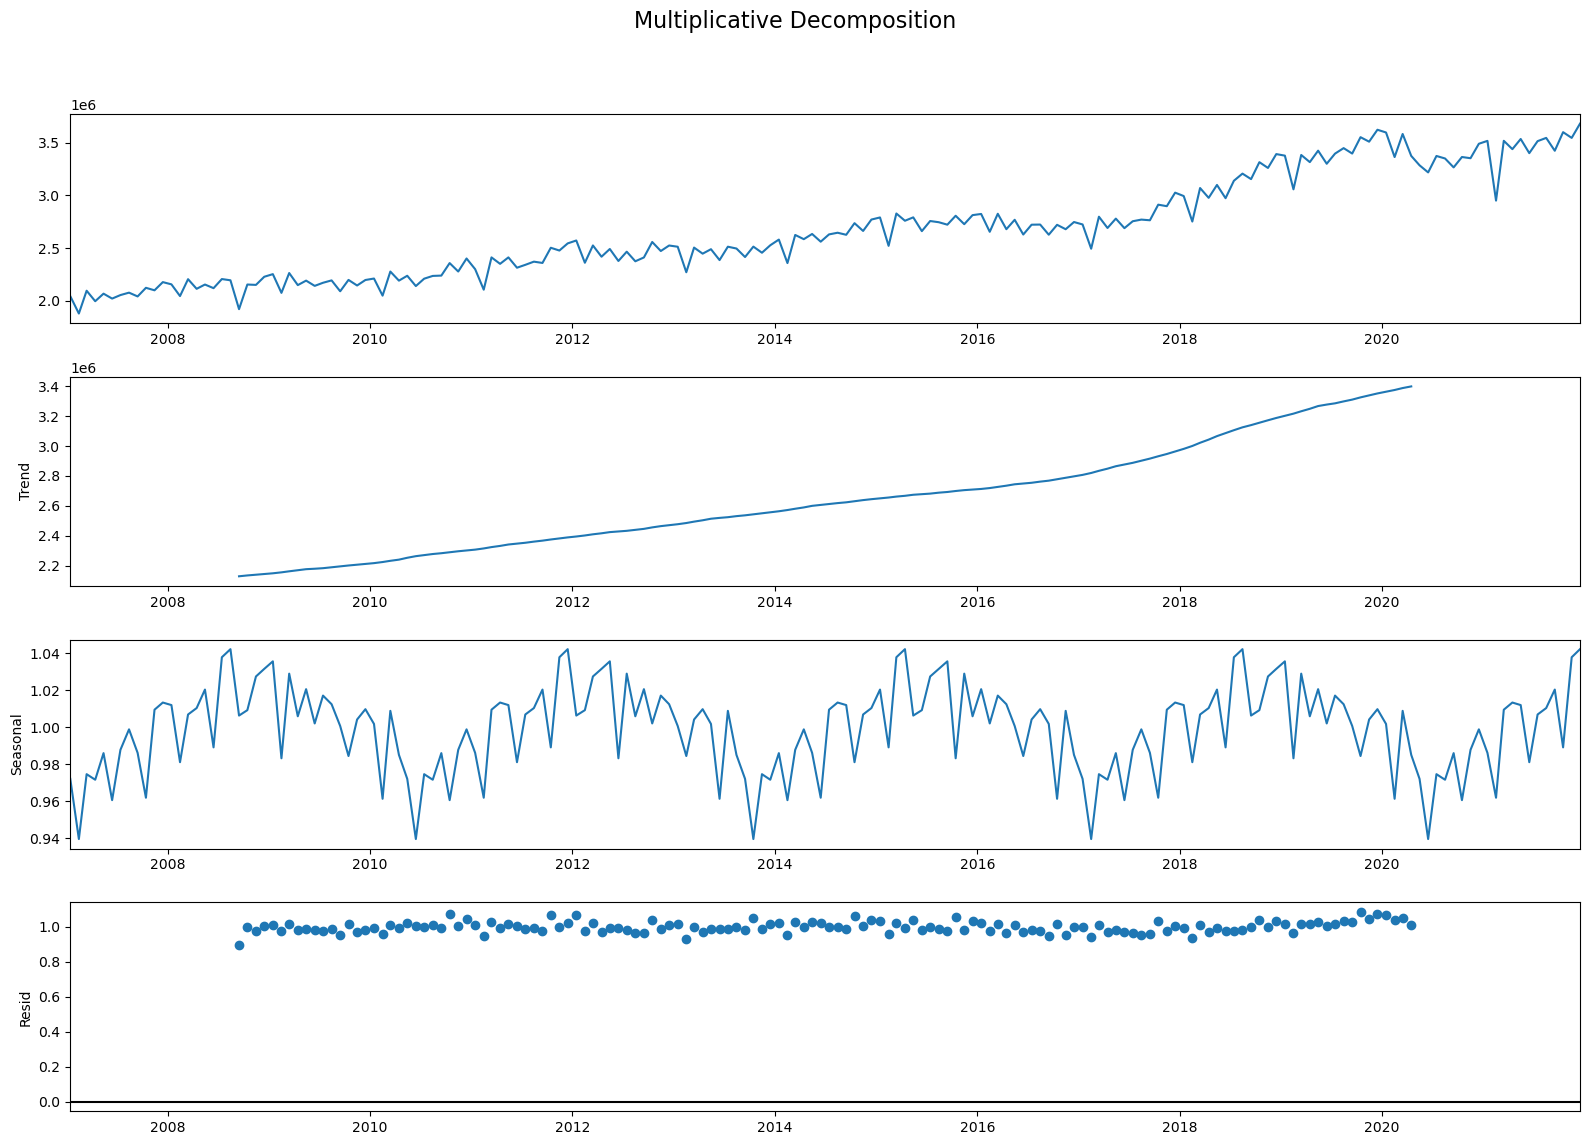

In [195]:
res2 = seasonal_decompose(df, model = 'multiplicative', period = 40)
res1 = seasonal_decompose(df, model = 'additive', period = 40)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
res1.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

res2.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

From the additive and mutliplicative model, we can infer that there is a increasing trend over the years. There is a seasonal pattern over roughly a period of 3 years.
Also, the residual pattern in additive model, there is some pattern left. Whereas in the multiplicative model the residual pattern is random, so the multiplicative model is suitable for the finding the seasonal, trend and the residual components of series.

3. Stationarity:

A stationary series is one where the values of the series is not a function of time. So, the values are independent of time.
Hence the statistical properties of the series like mean, variance and autocorrelation are constant over time. 
A stationary time series is independent of seasonal effects as well.

Augmented Dickey Fuller test or (ADF Test): It is the most commonly used test to detect stationaritywe assume that the null hypothesis is the time series possesses a unit root and is non-stationary. Taking the significance level as 0.05.

In [196]:
# statistical test
result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.174669
p-value: 0.970805
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576


The p value = 0.97, which is way greater than alpha. So, we fail to reject the null hypothesis. Wr infer that the time series is not stationary.

In order to make the time series stationary, we can perform transformations like logarthim, differencing, taking the nth root or a combination of above. For forecasting, we make the time series stationary. Here, we perform differencing, we begin with first order differencing.

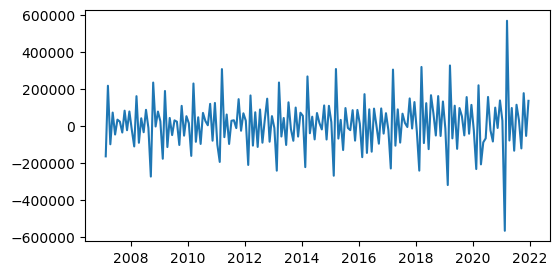

In [197]:
diff = df.diff()

plt.figure(figsize=(6,3))
pyplot.plot(diff)
pyplot.show()

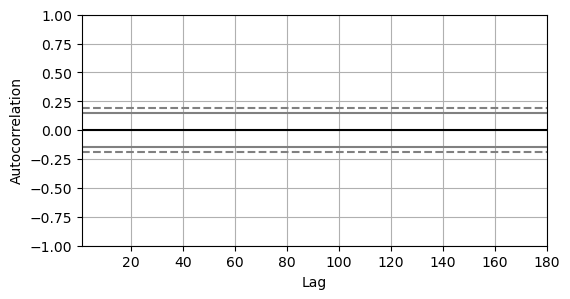

In [198]:
plt.figure(figsize=(6,3))
autocorrelation_plot(diff)
plt.show()

The 1st order differencing has no trend component or seasonal component. Also, to make sure this is stationary, we peform afduller test.

In [199]:
diff = diff.dropna()

In [200]:
# statistical test
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.905403
p-value: 0.044723
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576


The p value = 0.04 < significance level = 0.05. We can reject the null hypothesis and say that the series is stationary.

4. TS models:

For forecasting time series, we need appropriate time series model for prediction. Here we try ARIMA and LSTM model.

1. ARIMA Model

In [201]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [202]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [205]:
from warnings import filterwarnings
filterwarnings('ignore')

In [206]:
p_values = [0, 1, 2, 4]
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(df.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=732917.821
ARIMA(0, 0, 1) RMSE=459737.147
ARIMA(0, 0, 2) RMSE=344714.596
ARIMA(0, 1, 0) RMSE=169305.829
ARIMA(0, 1, 1) RMSE=148881.812
ARIMA(0, 1, 2) RMSE=149447.446
ARIMA(0, 2, 0) RMSE=300107.895
ARIMA(0, 2, 1) RMSE=178500.943
ARIMA(0, 2, 2) RMSE=175803.874
ARIMA(1, 0, 0) RMSE=174114.834
ARIMA(1, 0, 1) RMSE=139414.399
ARIMA(1, 0, 2) RMSE=135289.849
ARIMA(1, 1, 0) RMSE=148029.054
ARIMA(1, 1, 1) RMSE=149120.159
ARIMA(1, 1, 2) RMSE=145397.497
ARIMA(1, 2, 0) RMSE=215545.116
ARIMA(1, 2, 1) RMSE=175567.783
ARIMA(1, 2, 2) RMSE=175886.950
ARIMA(2, 0, 0) RMSE=141915.835
ARIMA(2, 0, 1) RMSE=136655.062
ARIMA(2, 0, 2) RMSE=133299.462
ARIMA(2, 1, 0) RMSE=149375.017
ARIMA(2, 1, 1) RMSE=149371.212
ARIMA(2, 1, 2) RMSE=142462.659
ARIMA(2, 2, 0) RMSE=190572.156
ARIMA(2, 2, 1) RMSE=177238.752
ARIMA(2, 2, 2) RMSE=173876.088
ARIMA(4, 0, 0) RMSE=136515.991
ARIMA(4, 0, 1) RMSE=135220.675
ARIMA(4, 0, 2) RMSE=137165.782
ARIMA(4, 1, 0) RMSE=149706.713
ARIMA(4, 1, 1) RMSE=148141.838
ARIMA(4,

The ARIMA model gives a huge rmse value. Therefore it wont be suitable to use the model.

In [207]:
# fit model
model = ARIMA(diff, order=(2,0,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                                           SARIMAX Results                                           
Dep. Variable:     U.S. Natural Gas Gross Withdrawals (MMcf)   No. Observations:                  179
Model:                                        ARIMA(2, 0, 2)   Log Likelihood               -2314.008
Date:                                       Tue, 04 Apr 2023   AIC                           4640.015
Time:                                               09:17:03   BIC                           4659.140
Sample:                                                    0   HQIC                          4647.770
                                                       - 179                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9147.8267   33

Applying arima on 1st order differencing

In [212]:
p_values = [0, 1, 2, 4]
d_values = range(0, 4)
q_values = range(0, 4)
evaluate_models(diff.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=170609.976
ARIMA(0, 0, 1) RMSE=136371.401
ARIMA(0, 0, 2) RMSE=132740.924
ARIMA(0, 0, 3) RMSE=133161.810
ARIMA(0, 1, 0) RMSE=302056.932
ARIMA(0, 1, 1) RMSE=170834.374
ARIMA(0, 1, 2) RMSE=141454.500
ARIMA(0, 1, 3) RMSE=135705.550
ARIMA(0, 2, 0) RMSE=561241.668
ARIMA(0, 2, 1) RMSE=303755.505
ARIMA(0, 2, 2) RMSE=178003.859
ARIMA(0, 2, 3) RMSE=142637.465
ARIMA(0, 3, 0) RMSE=1061677.216
ARIMA(0, 3, 1) RMSE=565010.249
ARIMA(0, 3, 2) RMSE=316996.118
ARIMA(0, 3, 3) RMSE=197573.126
ARIMA(1, 0, 0) RMSE=139790.848
ARIMA(1, 0, 1) RMSE=133413.143
ARIMA(1, 0, 2) RMSE=133829.359
ARIMA(1, 0, 3) RMSE=133170.882
ARIMA(1, 1, 0) RMSE=208547.448
ARIMA(1, 1, 1) RMSE=140154.500
ARIMA(1, 1, 2) RMSE=137225.525
ARIMA(1, 1, 3) RMSE=136716.933
ARIMA(1, 2, 0) RMSE=344588.583
ARIMA(1, 2, 1) RMSE=209582.390
ARIMA(1, 2, 2) RMSE=146848.116
ARIMA(1, 2, 3) RMSE=141436.570
ARIMA(1, 3, 0) RMSE=596606.420
ARIMA(1, 3, 1) RMSE=346493.260
ARIMA(1, 3, 2) RMSE=217327.531
ARIMA(1, 3, 3) RMSE=158994.710
ARIMA(2

In [213]:
# fit model
model_diff = ARIMA(diff, order=(4,1,3))
model_diff_fit = model_diff.fit()
# summary of fit model
print(model_diff_fit.summary())

                                           SARIMAX Results                                           
Dep. Variable:     U.S. Natural Gas Gross Withdrawals (MMcf)   No. Observations:                  179
Model:                                        ARIMA(4, 1, 3)   Log Likelihood               -2281.277
Date:                                       Tue, 04 Apr 2023   AIC                           4578.554
Time:                                               09:52:10   BIC                           4604.008
Sample:                                                    0   HQIC                          4588.876
                                                       - 179                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.1528     

5. Prediction

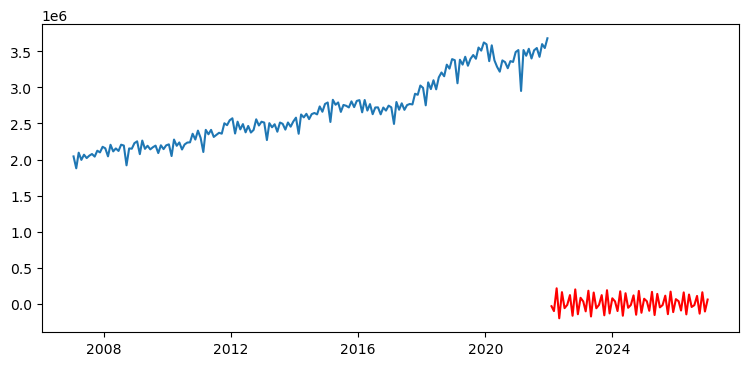

In [214]:
# specify the number of steps to forecast
n_steps = 60 # for example, to predict next 69 months
forecast = model_diff_fit.forecast(steps=n_steps)

plt.figure(figsize=(9,4))
plt.plot(df)
plt.plot(pd.date_range(start=df.index[-1], periods=n_steps+1, freq='M')[1:], forecast, color='red')
plt.show()

ARIMA model does seem to have really high rmse, even after applying ARIMA on the 1st order differencing model. 
So, let's try LSTM model.

LSTM model

Applying LSTM model on the differenced data.

In [217]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense 
import math
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [220]:
naturalgas_prod_gross = diff.iloc[:,0]
values = naturalgas_prod_gross.values
training_data_len = math.ceil(len(values)* 0.8)

In [221]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

In [222]:
x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [223]:
test_data = scaled_data[training_data_len-10: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(10, len(test_data)):
      x_test.append(test_data[i-10:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [229]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [238]:
model.compile(optimizer='adam', loss='mean_squared_error')
model_fit = model.fit(x_train, y_train, batch_size= 1, epochs=15)

Epoch 1/15
134/134 [==============================] - 10s 13ms/step - loss: 0.0024
Epoch 2/15
134/134 [==============================] - 2s 13ms/step - loss: 0.0021
Epoch 3/15
134/134 [==============================] - 2s 13ms/step - loss: 0.0023
Epoch 4/15
134/134 [==============================] - 2s 13ms/step - loss: 0.0025
Epoch 5/15
134/134 [==============================] - 2s 13ms/step - loss: 0.0023
Epoch 6/15
134/134 [==============================] - 2s 13ms/step - loss: 0.0023
Epoch 7/15
134/134 [==============================] - 2s 13ms/step - loss: 0.0023
Epoch 8/15
134/134 [==============================] - 2s 13ms/step - loss: 0.0020
Epoch 9/15
134/134 [==============================] - 2s 13ms/step - loss: 0.0023
Epoch 10/15
134/134 [==============================] - 2s 13ms/step - loss: 0.0022
Epoch 11/15
134/134 [==============================] - 2s 13ms/step - loss: 0.0021
Epoch 12/15
134/134 [==============================] - 2s 12ms/step - loss: 0.0020
Epoch 13/15


In [244]:
# Make predictions on the test data
predictions = model.predict(test_data)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse = np.sqrt(np.mean(((predictions - diff.iloc[:,0].values[int(len(diff)*0.8):]) ** 2)))
print('Root Mean Squared Error:', rmse)

2/2 [==============================] - 0s 2ms/step
Root Mean Squared Error: 239878.98380405267


1/1 [==============================] - 0s 62ms/step


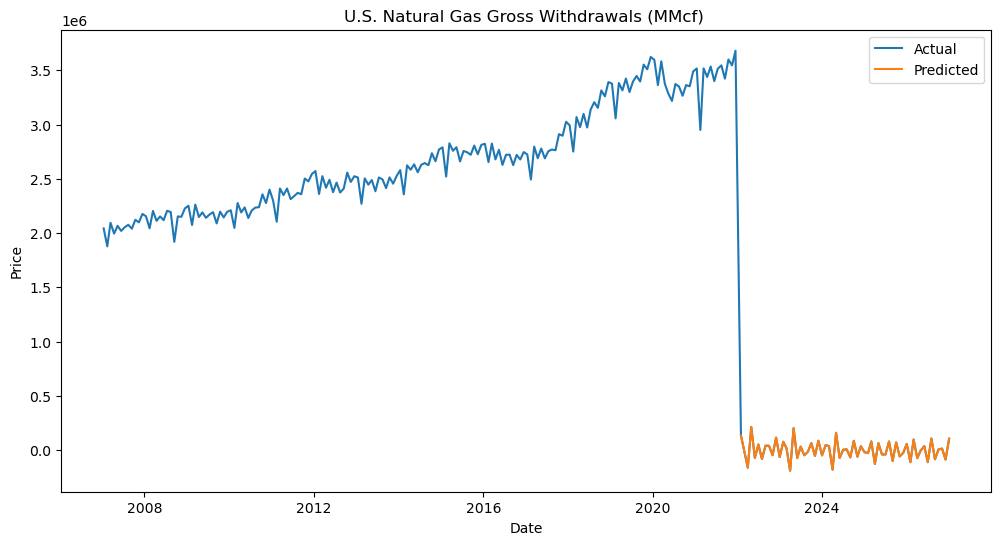

In [256]:
# Generate predictions for the next 3 years
n_months = 60 #5 months prediction
last_month = x_test[-1]

predicted_prices = []
for i in range(n_months):
    # Predict the price for the next month
    next_month = model.predict(last_month.reshape(1, -1, 1))
    predicted_prices.append(next_month[0, 0])
    
    # Update last_month with the predicted price
    last_month = np.append(last_month[1:], next_month)

# Inverse transform the predicted prices
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Add the predicted prices to the original dataframe
last_month_date = df.index[-1] + pd.offsets.MonthEnd()
predicted_dates = pd.date_range(start=last_month_date, periods=n_months+1, freq='M')[1:]
predicted_df = pd.DataFrame({'U.S. Natural Gas Gross Withdrawals (MMcf)': predicted_prices.flatten()}, index=predicted_dates)

# Concatenate the original and predicted dataframes
df_pred = pd.concat([df, predicted_df])

# Plot the original and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df_pred.index, df_pred.iloc[:,0], label='Actual')
plt.plot(predicted_df.index, predicted_df.iloc[:,0], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('U.S. Natural Gas Gross Withdrawals (MMcf) ')
plt.legend()
plt.show()

The ARIMA model seems to have a lesser rmse over LSTM. Also, the LSTM forecast doesn't really show an increasing trend. 

## 2. Consumption

We explore another aspect of natural gas i.e consumption. Here, we analyse consumptions from sources like plant fuel, commercial consumer, industrial, vehicle fuel, electric power consumers, pipeline use, consumers, residential. Here, we analyse these variables wrt time, thus making it a multivariate series.

1. Load Data

In [116]:
data = pd.read_excel('NG_SUM_LSUM_DCU_NUS_M.xls', sheet_name = "Data 5", skiprows = 2)
#drop na values 
data = data.dropna()
data.index = pd.DatetimeIndex(data['Date'])
#Convert the Date column into a date object
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,U.S. Natural Gas Total Consumption (MMcf),U.S. Natural Gas Lease and Plant Fuel Consumption (MMcf),U.S. Natural Gas Pipeline & Distribution Use (MMcf),Natural Gas Delivered to Consumers in the U.S. (MMcf),U.S. Natural Gas Residential Consumption (MMcf),Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in the U.S. (MMcf),U.S. Natural Gas Industrial Consumption (MMcf),U.S. Natural Gas Vehicle Fuel Consumption (MMcf),U.S. Natural Gas Deliveries to Electric Power Consumers (MMcf)
Date,,,,,,,,,,
2001-01-15,2001-01-15,2676998.0,95602.0,76386.0,2505011.0,976677,500267,686540.0,1235.0,340292.0
2001-02-15,2001-02-15,2309464.0,86821.0,65770.0,2156873.0,780482,422407,640026.0,1115.0,312843.0
2001-03-15,2001-03-15,2246633.0,96438.0,63626.0,2086568.0,681884,375688,664918.0,1235.0,362843.0
2001-04-15,2001-04-15,1807170.0,92602.0,50736.0,1663832.0,400728,255361,622054.0,1195.0,384494.0
2001-05-15,2001-05-15,1522382.0,94981.0,42238.0,1385163.0,209327,164146,576532.0,1235.0,433923.0


In [124]:
# We are using the columns except the date column, since we used date as an index and the total consumption column. 
df = data.drop(['Date', 'U.S. Natural Gas Total Consumption (MMcf)'] , axis = 1 )
df.head()

,U.S. Natural Gas Lease and Plant Fuel Consumption (MMcf),U.S. Natural Gas Pipeline & Distribution Use (MMcf),Natural Gas Delivered to Consumers in the U.S. (MMcf),U.S. Natural Gas Residential Consumption (MMcf),Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in the U.S. (MMcf),U.S. Natural Gas Industrial Consumption (MMcf),U.S. Natural Gas Vehicle Fuel Consumption (MMcf),U.S. Natural Gas Deliveries to Electric Power Consumers (MMcf)
Date,,,,,,,,
2001-01-15,95602.0,76386.0,2505011.0,976677,500267,686540.0,1235.0,340292.0
2001-02-15,86821.0,65770.0,2156873.0,780482,422407,640026.0,1115.0,312843.0
2001-03-15,96438.0,63626.0,2086568.0,681884,375688,664918.0,1235.0,362843.0
2001-04-15,92602.0,50736.0,1663832.0,400728,255361,622054.0,1195.0,384494.0
2001-05-15,94981.0,42238.0,1385163.0,209327,164146,576532.0,1235.0,433923.0


2. Data visualisation

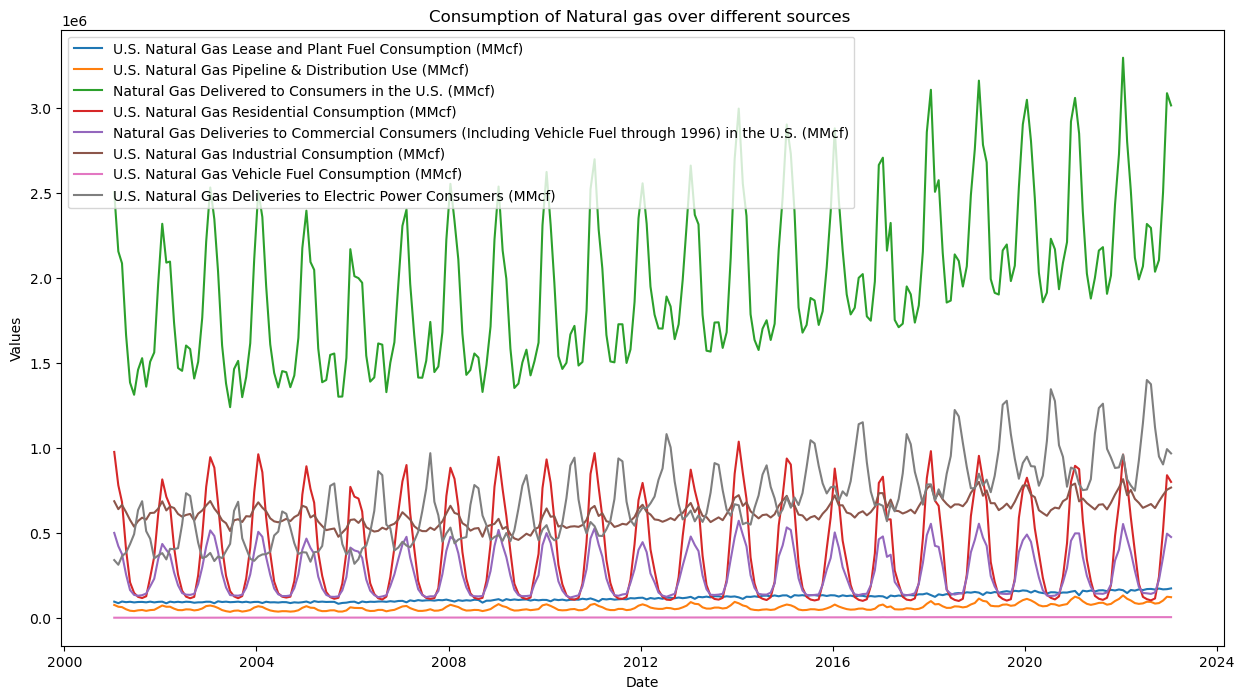

In [118]:
# time series plot 
plt.figure(figsize=(15, 8))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.legend()
plt.title('Consumption of Natural gas over different sources ')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

This plot captures the pattern of all the 8 columns simulataneously.

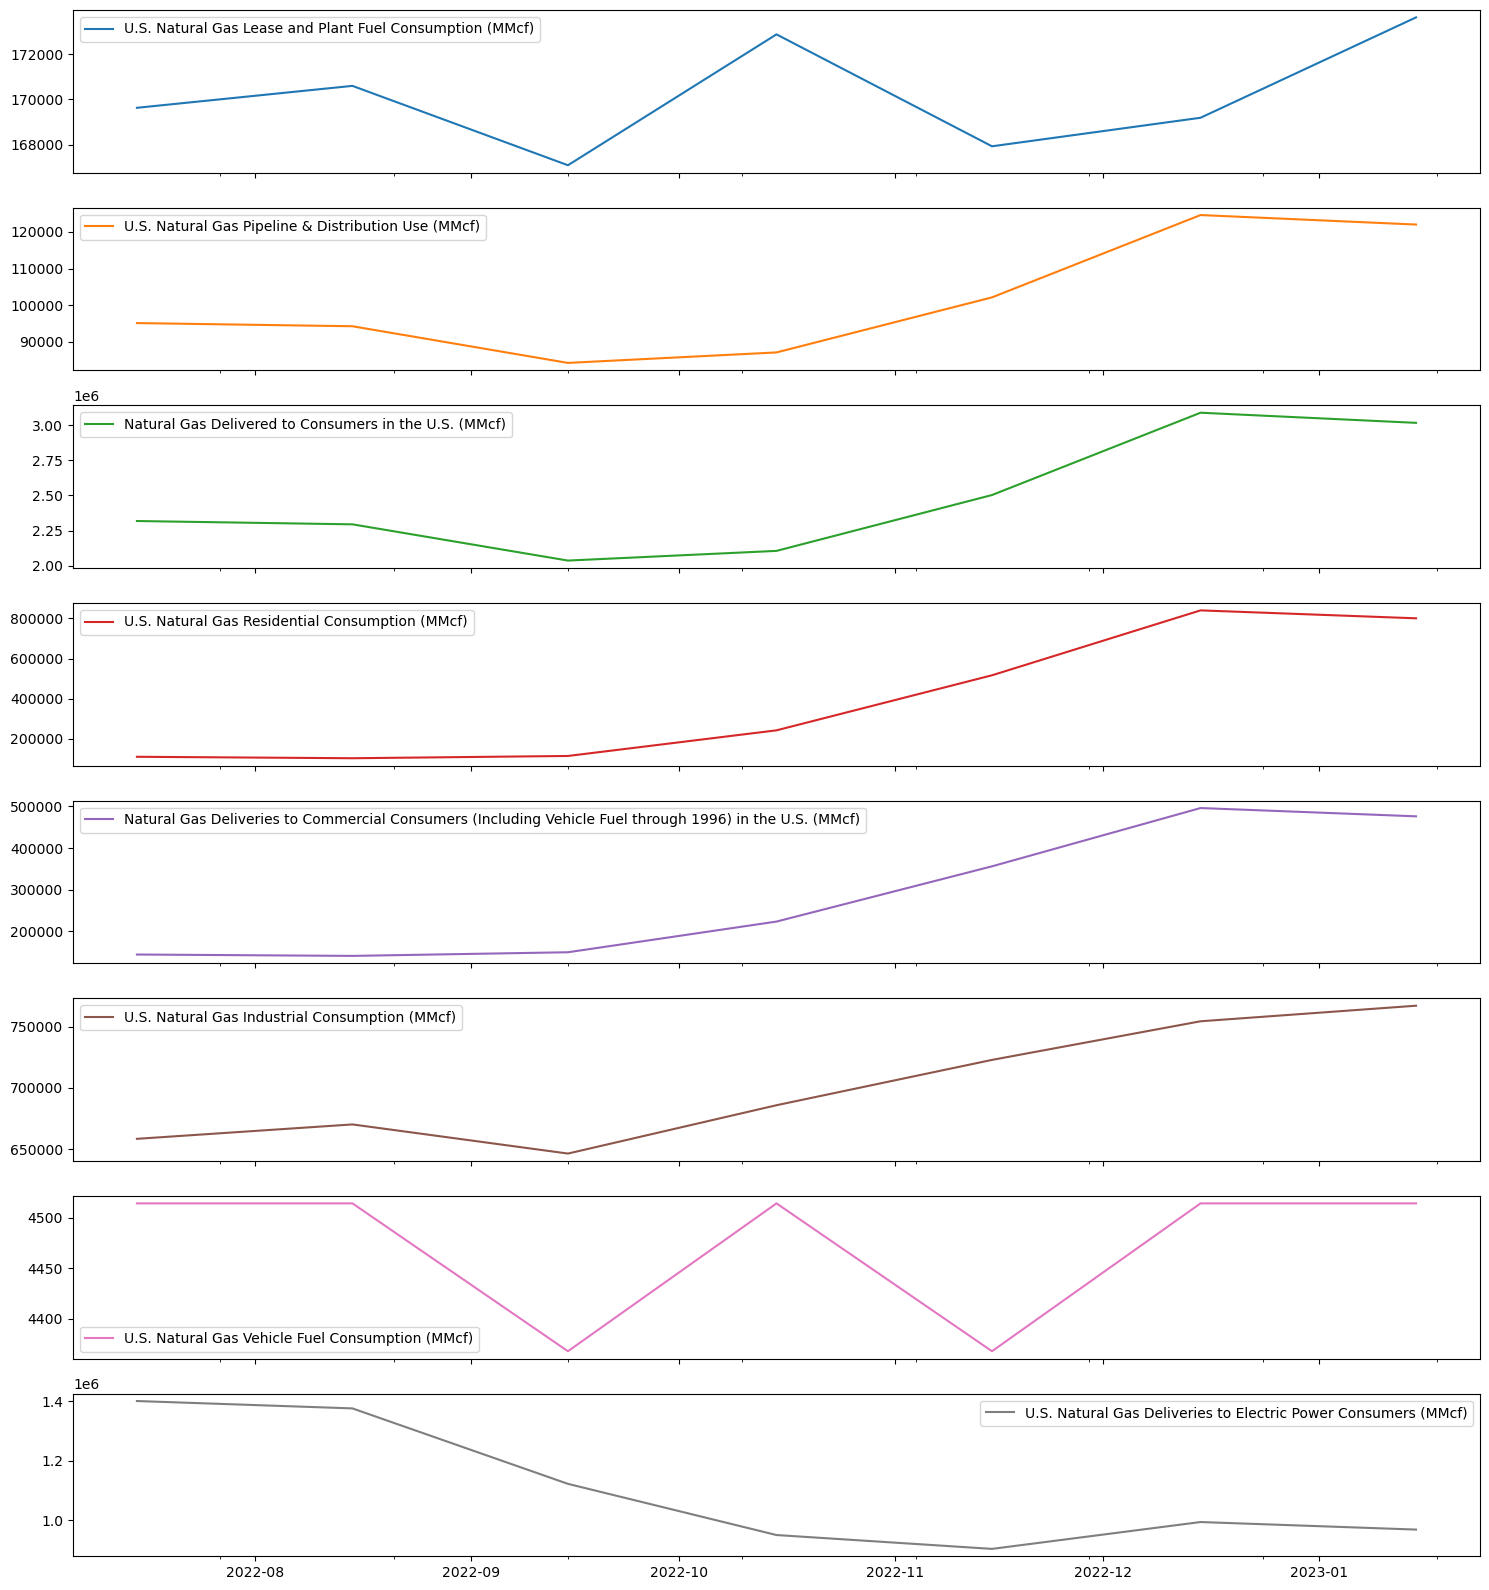

In [147]:
fig,ax = plt.subplots(df.shape[-1], figsize=(15,16), sharex=True)
df.iloc[-7:].plot(subplots=True, ax=ax)
ax[-1].set_xlabel('')
plt.tight_layout()
plt.show()

Except for the eletric power consumers, all other consumptions resources have a overall increasing trend.

3. Decomposition

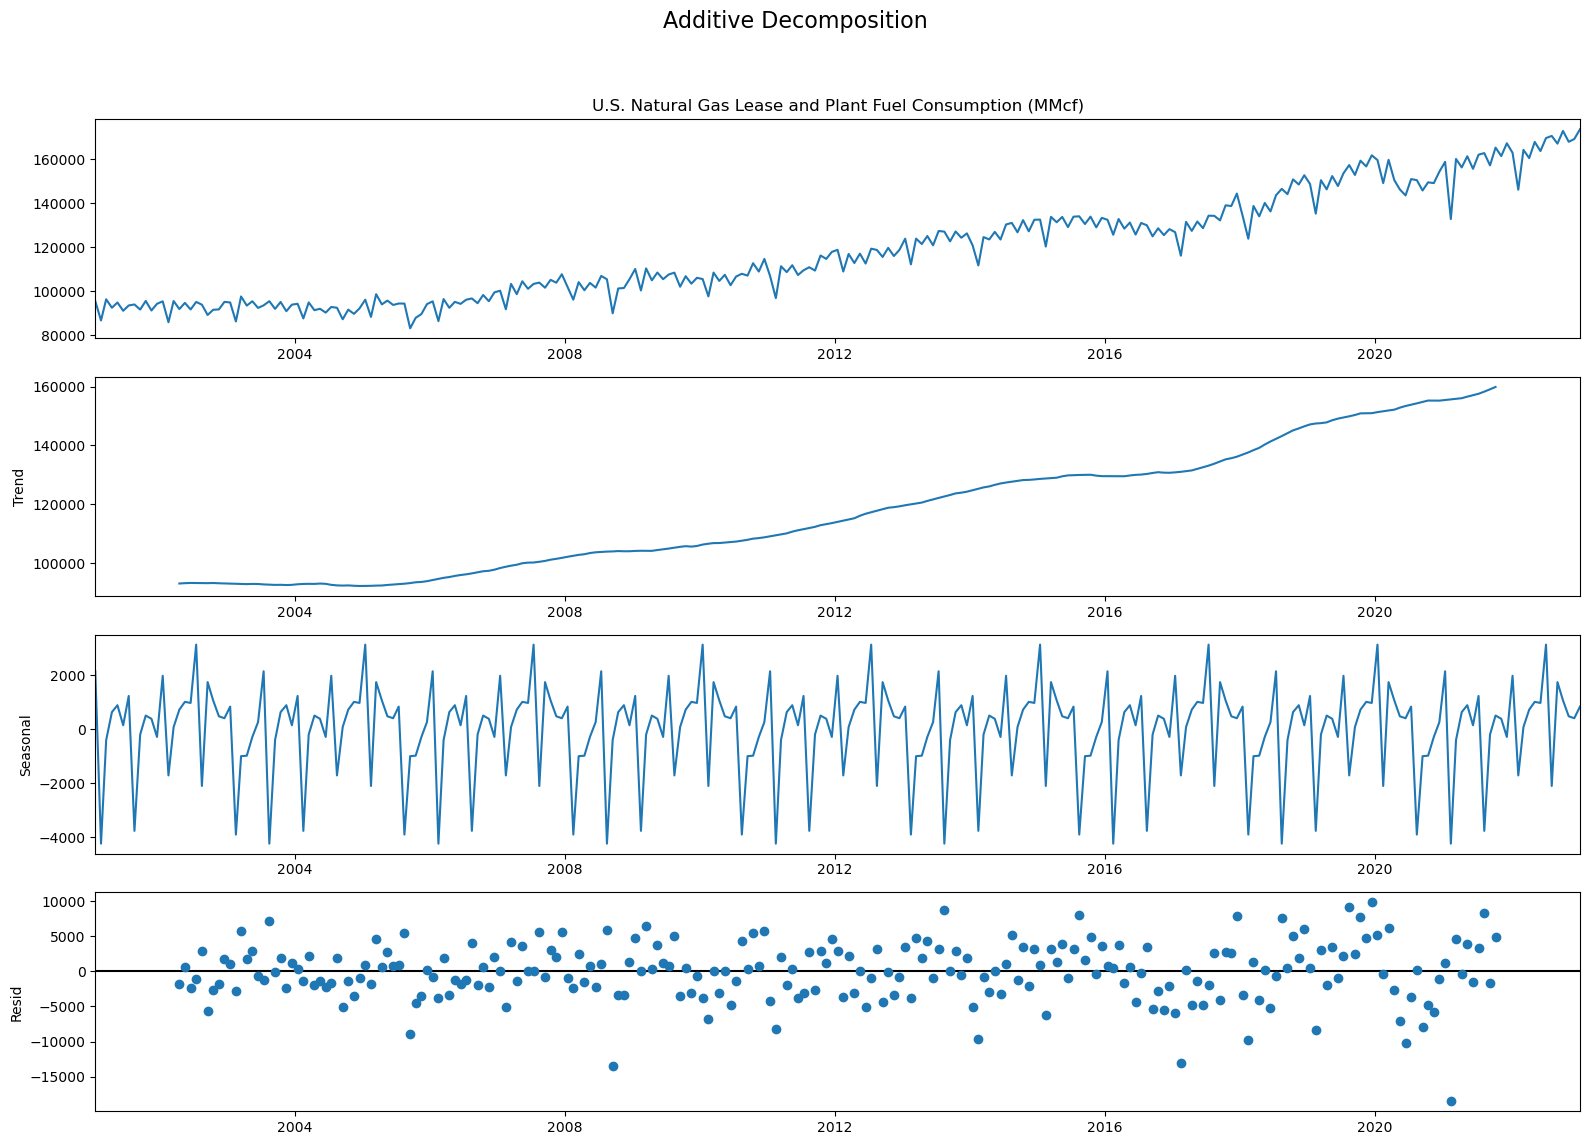

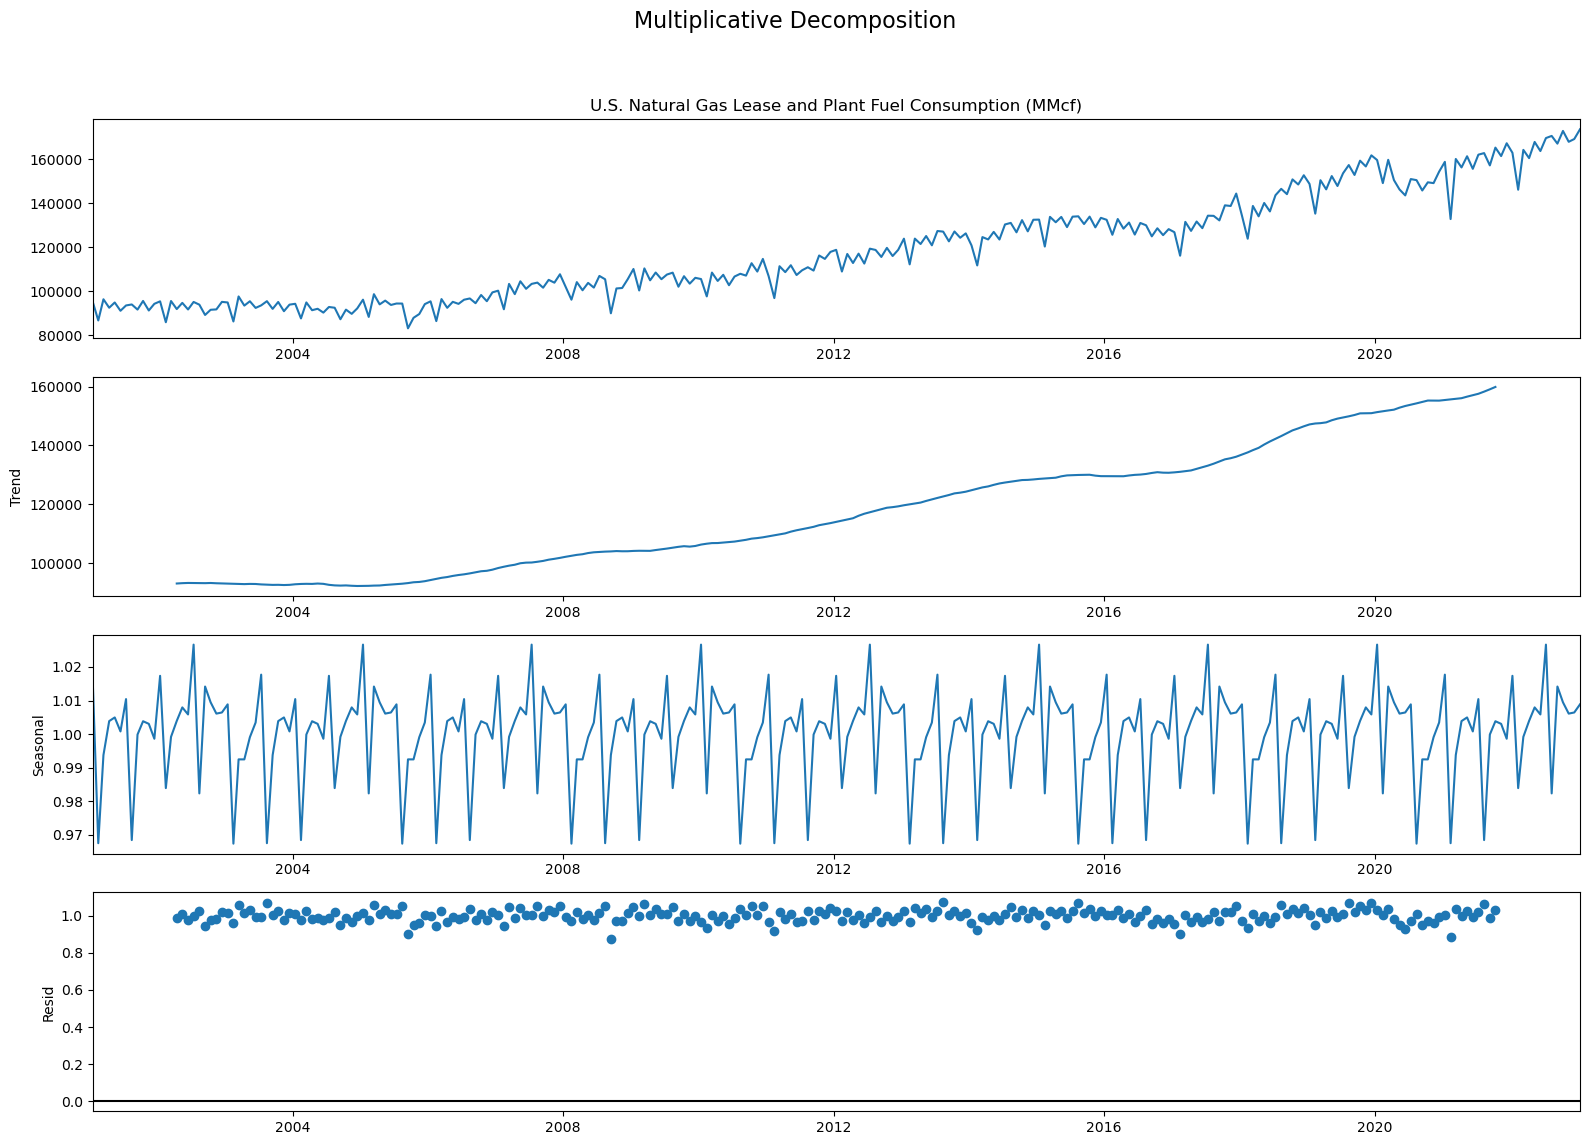

In [128]:
res2 = seasonal_decompose(df.iloc[:,0], model = 'multiplicative', period = 30)
res1 = seasonal_decompose(df.iloc[:,0], model = 'additive', period = 30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
res1.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

res2.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

The residual for multiplicative model is random, so it is preferred for this series.
Similarly, we can apply this for the remaining columns.

4. Stationary test

Here, we have performed stationary test for all the columns.

In [130]:
def adfuller_test(series, signif=0.05):
    x = adfuller(series, autolag='AIC')

    #using dictionary saves different data types (float, int, boolean)
    output = {'Test Statistic': x[0], 
              'P-value': x[1], 
              'Number of lags': x[2], 
              'Number of observations': x[3],
              f'Reject (signif. level {signif})': x[1] < signif }

    for key, val in x[4].items():
         output[f'Critical value {key}'] = val
            
    return pd.Series(output)

In [131]:
df.apply(lambda x: adfuller_test(x), axis=0)

,U.S. Natural Gas Lease and Plant Fuel Consumption (MMcf),U.S. Natural Gas Pipeline & Distribution Use (MMcf),Natural Gas Delivered to Consumers in the U.S. (MMcf),U.S. Natural Gas Residential Consumption (MMcf),Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in the U.S. (MMcf),U.S. Natural Gas Industrial Consumption (MMcf),U.S. Natural Gas Vehicle Fuel Consumption (MMcf),U.S. Natural Gas Deliveries to Electric Power Consumers (MMcf)
Test Statistic,1.361575,0.399653,-0.076052,-3.496007,-2.691346,-1.022307,-0.450248,-0.269958
P-value,0.996932,0.981482,0.951772,0.00809,0.075548,0.745042,0.901365,0.929653
Number of lags,12,14,14,14,14,15,14,13
Number of observations,252,250,250,250,250,249,250,251
Reject (signif. level 0.05),False,False,False,True,False,False,False,False
Critical value 1%,-3.456569,-3.456781,-3.456781,-3.456781,-3.456781,-3.456888,-3.456781,-3.456674
Critical value 5%,-2.873079,-2.873172,-2.873172,-2.873172,-2.873172,-2.873219,-2.873172,-2.873125
Critical value 10%,-2.572919,-2.572969,-2.572969,-2.572969,-2.572969,-2.572994,-2.572969,-2.572944


As we can see that the 4th and 6th column in the dataframe, all the columns have a significant p value so we fail to reject the null hypothesis.So, the series is not stationary for most of all the columns. We perform differencing and later check the stationarity again.

In [134]:
#1st order differencing
df_diff = df.diff().dropna()

In [181]:
df_diff2 = df_diff.diff().dropna()

In [135]:
#stationary
df_diff.apply(lambda x: adfuller_test(x), axis=0)

,U.S. Natural Gas Lease and Plant Fuel Consumption (MMcf),U.S. Natural Gas Pipeline & Distribution Use (MMcf),Natural Gas Delivered to Consumers in the U.S. (MMcf),U.S. Natural Gas Residential Consumption (MMcf),Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in the U.S. (MMcf),U.S. Natural Gas Industrial Consumption (MMcf),U.S. Natural Gas Vehicle Fuel Consumption (MMcf),U.S. Natural Gas Deliveries to Electric Power Consumers (MMcf)
Test Statistic,-5.181959,-4.024246,-5.745645,-6.403162,-7.269051,-4.0031,-4.823035,-5.058574
P-value,0.00001,0.001289,0.000001,0.0,0.0,0.001394,0.000049,0.000017
Number of lags,11,13,13,13,12,14,13,12
Number of observations,252,250,250,250,251,249,250,251
Reject (signif. level 0.05),True,True,True,True,True,True,True,True
Critical value 1%,-3.456569,-3.456781,-3.456781,-3.456781,-3.456674,-3.456888,-3.456781,-3.456674
Critical value 5%,-2.873079,-2.873172,-2.873172,-2.873172,-2.873125,-2.873219,-2.873172,-2.873125
Critical value 10%,-2.572919,-2.572969,-2.572969,-2.572969,-2.572944,-2.572994,-2.572969,-2.572944


For all the columns, we can now see that p value < significance level, so we reject the null hypothesis. We can conclude that the series is stationary after 1st order differencing.

5. TS models

1. VAR model

In [182]:
training_set = df_diff2[:int(0.90*(len(df_diff2)))]
test_set = df_diff2[int(0.90*(len(df_diff2))):]
    
#Fit to a VAR model
model = VAR(endog=training_set)
#lags = model.select_order(maxlags=2)['aic']
model_fit = model.fit()
#Print a summary of the model results
model_fit.summary()

C:\Users\Sakshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 04, Apr, 2023
Time:                     00:47:18
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    128.129
Nobs:                     235.000    HQIC:                   127.496
Log likelihood:          -17526.2    FPE:                1.53286e+55
AIC:                      127.069    Det(Omega_mle):     1.13482e+55
--------------------------------------------------------------------
Results for equation U.S. Natural Gas Lease and Plant Fuel Consumption (MMcf)
                                                                                                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------------------------------------------------

In [183]:
#Compare the forecasted results to the real data 
pred = model_fit.forecast(test_set.values, steps = 27)
forecast = pd.DataFrame(pred, index=test_set.index, columns=test_set.columns)

In [184]:
rmse = sqrt(mean_squared_error(test_set, forecast))
rmse

156025.13301959203

6. Prediction

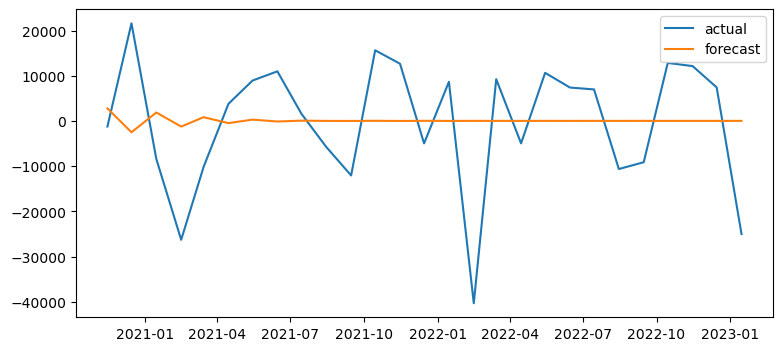

In [185]:
plt.figure(figsize=(9,4))
plt.plot(test_set.index, test_set.iloc[:,1], label='actual')
plt.plot(test_set.index, forecast.iloc[:,1], label='forecast')
plt.legend()
plt.show()

The model gives a relatively high rmse, need to apply a model which can capture all the 8 columns of the series in once. 

Tried with the VARMA model gives an error of %-th leading minor of the array is not positive definite. This error happens when your covariance matrix doesn't appear numerically to be positive definite.

### Team Contributions: 
We are a team of 2. The data of natural gas was split into 4 sheets, Shruti performed analysis of price and imports and exports. Sakshi performed production and consumption.

#### References:
1. https://stackoverflow.com/questions/66936732/how-to-do-the-adf-test-for-each-column-of-my-dataframe-in-python
2. https://towardsdatascience.com/multivariate-time-series-forecasting-456ace675971
